<a href="https://colab.research.google.com/github/Harshitagupta324/Sentiment-Analysis-on-Video-Captions/blob/main/Bing_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 KB 4.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from textblob import TextBlob
import math
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the TED talk transcript data from a CSV file
df = pd.read_csv('/content/merged_file_final.csv')
# Initialize the sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Define a function to get the sentiment score of a given transcript using the Bing lexicon
def get_sentiment_score(text):
    if isinstance(text, float) and math.isnan(text):
        return 0.0
    else:
        blob_score = TextBlob(text).sentiment.polarity
        vader_score = analyzer.polarity_scores(text)['compound']
        sentiment_score = (blob_score + vader_score) / 2
        return sentiment_score

# Add a new column to the DataFrame with the sentiment score for each transcript
df['sentiment_score'] = df['transcript'].apply(get_sentiment_score)

# Print the first 10 rows of the DataFrame to check the results
print(df.head(10))


                                          transcript         main_speaker  \
0  Good morning. How are you?(Laughter)It's been ...         Ken Robinson   
1  Thank you so much, Chris. And it's truly a gre...              Al Gore   
2  (Music: "The Sound of Silence," Simon & Garfun...          David Pogue   
3  If you're here today — and I'm very happy that...        Majora Carter   
4  About 10 years ago, I took on the task to teac...         Hans Rosling   
5  Thank you. I have to tell you I'm both challen...         Tony Robbins   
6  On September 10, the morning of my seventh bir...        Julia Sweeney   
7  I'm going to present three projects in rapid f...  Joshua Prince-Ramus   
8  It's wonderful to be back. I love this wonderf...          Dan Dennett   
9  I'm often asked, "What surprised you about the...          Rick Warren   

                                               title Unnamed: 3 Unnamed: 4  \
0                        Do schools kill creativity?        NaN        NaN

In [ ]:
df = df.drop(df.columns[3:253], axis=1)
df = df.dropna(how='all')
print(df)

                                             transcript         main_speaker  \
0     Good morning. How are you?(Laughter)It's been ...         Ken Robinson   
1     Thank you so much, Chris. And it's truly a gre...              Al Gore   
2     (Music: "The Sound of Silence," Simon & Garfun...          David Pogue   
3     If you're here today — and I'm very happy that...        Majora Carter   
4     About 10 years ago, I took on the task to teac...         Hans Rosling   
...                                                 ...                  ...   
2549                                                NaN     Duarte Geraldino   
2550                                                NaN  Armando Azua-Bustos   
2551                                                NaN       Radhika Nagpal   
2552                                                NaN     Theo E.J. Wilson   
2553                                                NaN    Karoliina Korppoo   

                                       

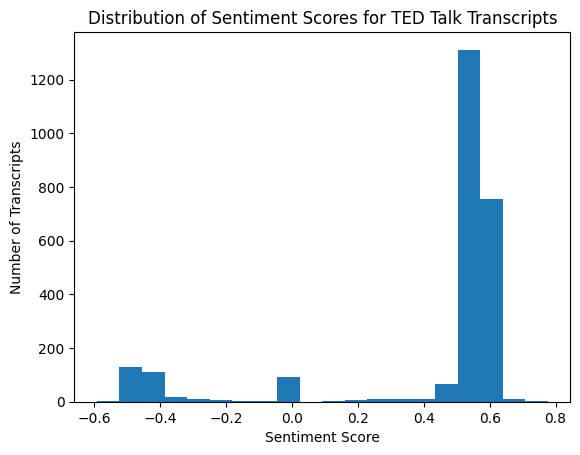

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['sentiment_score'], bins=20)
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Transcripts')
plt.title('Distribution of Sentiment Scores for TED Talk Transcripts')
plt.show()